# Twin4Build: Space Heating Control Example

This notebook demonstrates how to create and simulate a space heating control system using Twin4Build. You'll learn how to:
1. Create a model with a space heater and temperature sensors
2. Set up temperature schedules and control logic
3. Simulate the heating system
4. Analyze thermal performance

## 1. Setup and Installation
First, let's install and import the necessary packages.

Note: If you're using Google Colab, uncomment the pip install line in the next cell.

In [11]:
# %pip install twin4build # Uncomment in google colab
import sys
import twin4build as tb
import datetime
from dateutil import tz
# import twin4build.utils.plot.plot as plot

## Creating the Model

Now that we have our packages installed and imported, let's create a simple model.

In [12]:
# Create a new model
model = tb.Model(id="space_heater_example")
print(model)

+------------------------------------------------------------------------------------------------------------------------------+
|                                          Model overview    id: space_heater_example                                          |
+---------------------------------------------+--------------------------------------------------------------------------------+
|  Number of components in simulation model:  |                                       0                                        |
+---------------------------------------------+--------------------------------------------------------------------------------+
| Number of connections in simulation model:  |                                       0                                        |
+---------------------------------------------+--------------------------------------------------------------------------------+
|              Model directory:               | C:\Users\jabj\AppData\Local\Temp\1\generated_file

### Instantiating Components
As shown by the printout, the model is currently empty.<br>
Let's instantiate two components: a schedule and a damper.<br>
The inputs and outputs of the components are shown in the printout.<br>
Note that any class in the Twin4Build package ending with "System" can be used as a component.<br>
E.g.:


In [13]:
tb.ScheduleSystem
tb.AirToAirHeatRecoverySystem
tb.FanSystem

twin4build.systems.fan.fan_system.FanSystem

In [14]:
# Water flow schedule configuration
# This schedule controls the hot water flow rate through the heater
waterflow_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 0,    # Default flow rate when no rule applies [m³/s]
        "ruleset_start_minute": [0,0], # Start minutes for each period
        "ruleset_end_minute": [0,0],   # End minutes for each period
        "ruleset_start_hour": [8, 19], # Start hours (8:00 and 19:00)
        "ruleset_end_hour": [16, 20],  # End hours (16:00 and 20:00)
        # Flow rate calculation: Q/(cp*ΔT) where:
        # Q = 2000W (heating power)
        # cp = 4180 J/kg·K (water specific heat)
        # ΔT = 60-30 = 30K (temperature difference)
        "ruleset_value": [2000/4180/(60-30), 2000/4180/(60-30)]  # [m³/s]
    },
    id="Waterflow schedule"
)
watertemperature_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 60,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="Water temperature schedule"
)
indoortemperature_schedule = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 21,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="Indoor temperature schedule"
)

indoortemperature_schedule2 = tb.ScheduleSystem(
    weekDayRulesetDict = {
        "ruleset_default_value": 21,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    },
    id="Indoor temperature schedule 2"
)

# Space heater configuration
# This component models a hydronic radiator with the following parameters:
space_heater = tb.SpaceHeaterStateSpace(
    Q_flow_nominal_sh=2000,        # Nominal heating power [W]
    T_a_nominal_sh=60,             # Supply water temperature [°C]
    T_b_nominal_sh=30,             # Return water temperature [°C]
    TAir_nominal_sh=21,            # Design room temperature [°C]
    thermalMassHeatCapacity=1e+5,  # Thermal mass of heater [J/K]
    nelements=100,                  # Number of elements for discretization
    id="sh"                        # Unique identifier
)

# Important notes:
# - Q_flow_nominal_sh should match your heating requirements
# - Temperature differences affect efficiency
# - Higher nelements = more accurate but slower simulation


### Connecting Components

Now that we have our components, let's connect them in the model.

In [15]:
# Connect the schedule's output to the damper's input
model.add_connection(waterflow_schedule, space_heater, "scheduleValue", "waterFlowRate")
model.add_connection(watertemperature_schedule, space_heater, "scheduleValue", "supplyWaterTemperature")
model.add_connection(indoortemperature_schedule, space_heater, "scheduleValue", "indoorTemperature")
model.remove_connection(indoortemperature_schedule, space_heater, "scheduleValue", "indoorTemperature")
model.add_connection(indoortemperature_schedule2, space_heater, "scheduleValue", "indoorTemperature")


2025-05-09:08:59:50,010 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,013 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,015 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,017 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,019 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule 2 does not look like a valid URI, trying to serialize this will break.


### Loading Model
Before we can simulate the model, we need to load it.<br>
This performs some internal operations and checks to prepare the model and ensure that the model is valid.

In [16]:
model.load()


Loading model...[OK]
   |___Drawing simulation model...

2025-05-09:08:59:50,560 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule 2 does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,561 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule 2 does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,564 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,565 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,568 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:50,570 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.


2025-05-09:08:59:58,610 WARNING [term.py:287] http://simulation.org/Waterflow schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:58,611 WARNING [term.py:287] http://simulation.org/Water temperature schedule does not look like a valid URI, trying to serialize this will break.
2025-05-09:08:59:58,614 WARNING [term.py:287] http://simulation.org/Indoor temperature schedule 2 does not look like a valid URI, trying to serialize this will break.



Loading model...[OK]
   |___Removing cycles...[OK]
   |___Determining execution order...[OK]
   |___Loading parameters...[OK]
   |___Validating model...[OK]
   |   |
   |
   |___Validated for Simulator...OK
   |___Validated for Estimator...OK
   |___Validated for Evaluator...OK
   |___Validated for Monitor...OK
   |___

+---------------------------------------------------------------------+
|     Model overview    id: space_heater_example_simulation_model     |
+---------------------------------------------+-----------------------+
|  Number of components in simulation model:  |           4           |
+---------------------------------------------+-----------------------+
| Number of connections in simulation model:  |           6           |
+---------------------------------------------+-----------------------+
|                                             |                       |
|                                             |                       |
+----------------------------

### Visualizing the Model (not required)
We can visualize the model to see the components and connections.<br>
This is not required, but it can be helpful for debugging and for building the model.<br>
The nodes in the graph represent components, and the edges represent connections between components as defined earlier.

In [17]:
# import matplotlib.pyplot as plt
# import os
# sim_graph = model.get_dir(folder_list=["simulation_model", "semantic_model", "graphs"], filename="semantic_model.png")[0]
# image = plt.imread(sim_graph)
# plt.figure(figsize=(15,15))
# plt.imshow(image)
# plt.axis('off')
# plt.show()

# for triples in model._simulation_model._semantic_model.graph.triples((None, None, None)):
#     print(triples)





## 2. Simulating the Model

Now that our model is set up, let's simulate it for a 2-day period.

In [26]:
# Set up the simulator and simulation parameters
simulator = tb.Simulator(model)
stepSize = 600  # Seconds
startTime = datetime.datetime(year=2024, month=1, day=5, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2024, month=1, day=7, hour=0, minute=0, second=0, tzinfo=tz.gettz("Europe/Copenhagen"))

# Simulate the model
simulator.simulate(stepSize=stepSize,
                    startTime=startTime,
                    endTime=endTime)


UA0: 222.22222222222223
UA_val: 98.47603541735313


100%|██████████| 288/288 [00:00<00:00, 1641.82it/s]


## Visualizing the Results

Finally, let's visualize the results of our simulation.
We can use the general plot_component function to plot the results of the damper.


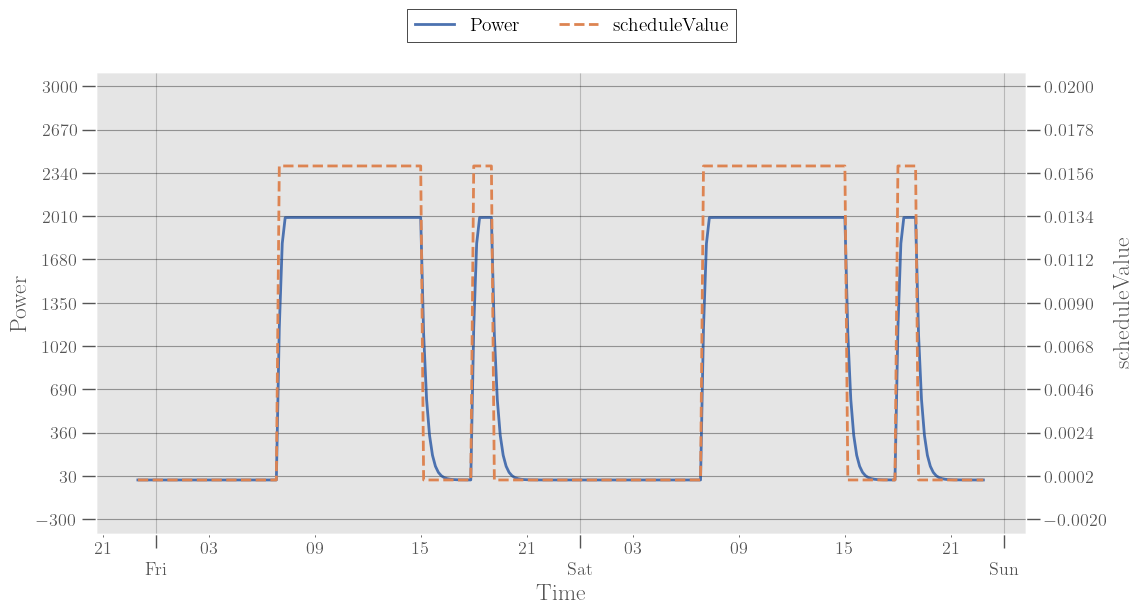

(<Figure size 1200x600 with 2 Axes>,
 [<Axes: xlabel='Time', ylabel='Power'>, <Axes: ylabel='scheduleValue'>])

In [27]:
tb.plot.plot_component(simulator,
                    components_1axis=[("sh", "Power", "output")], 
                    components_2axis=[("Waterflow schedule", "scheduleValue", "output")],
                    # ylabel_1axis="Air flow rate", #Optional
                    # ylabel_2axis="Damper position", #Optional
                    show=True,
                    nticks=11)


## Conclusion

Congratulations! You've successfully created a simple Twin4Build model, simulated it, and visualized the results. 

In this tutorial, you learned how to:
1. Create a model and add components (schedule and damper)
2. Connect components in the model
3. Set up and run a simulation
4. Visualize the simulation results

Next steps:
- Try adding more components to create more complex models
- Experiment with different schedules and parameter values
- Explore other visualization options in the `plot` module

For more advanced usage and detailed documentation, please refer to the Twin4Build documentation.